# Expolrative Data Analysis for Project 1

## Variables

"timestamp" - timestamp field for grouping the data

"cnt" - the count of a new bike shares

"t1" - real temperature in C

"t2" - temperature in C "feels like"

"hum" - humidity in percentage

"windspeed" - wind speed in km/h

"weathercode" - category of the weather

"isholiday" - boolean field - 1 holiday / 0 non holiday

"isweekend" - boolean field - 1 if the day is weekend

"season" - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.

"weathe_code" category description:

1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity 2 = scattered clouds / few clouds 3 = Broken clouds 4 = Cloudy 7 = Rain/ light Rain shower/ Light rain 10 = rain with thunderstorm 26 = snowfall 94 = Freezing Fog

## Data Preparation

Import and show data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("input/train.csv")
df

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
1,2015-01-04 07:00:00,75,1.0,-1.0,100.0,7.0,4.0,0.0,1.0,3.0
2,2015-01-04 08:00:00,131,1.5,-1.0,96.5,8.0,4.0,0.0,1.0,3.0
3,2015-01-04 09:00:00,301,2.0,-0.5,100.0,9.0,3.0,0.0,1.0,3.0
4,2015-01-04 10:00:00,528,3.0,-0.5,93.0,12.0,3.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
12218,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
12219,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
12220,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
12221,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


Drop all of the rows which have NaN

In [2]:
df.dropna(axis=0, how='any')
df.shape

(12223, 10)

In [3]:
df.dtypes

timestamp        object
cnt               int64
t1              float64
t2              float64
hum             float64
wind_speed      float64
weather_code    float64
is_holiday      float64
is_weekend      float64
season          float64
dtype: object

To explore and use variable 'timestamp', divide 'timestamp' to 'year', 'month', 'day' and 'hour' for further analysis

In [4]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['day'] = df['timestamp'].dt.day
df['hour'] = df['timestamp'].dt.hour
df.dtypes

timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code           float64
is_holiday             float64
is_weekend             float64
season                 float64
year                     int64
month                    int64
day                      int64
hour                     int64
dtype: object

The quantitative variables include 'cnt', 't1', 't2', 'hum', 'wind_speed'.

The categorical variables include 'weather_code', 'is_holiday', 'is_weekend', 'season', 'year', 'month', 'day', 'hour'.

Seperate quantitative variables and categorical variables.

In [5]:
quantitative = ['cnt', 't1', 't2', 'hum', 'wind_speed']
categorical = ['weather_code','is_holiday', 'is_weekend', 'season', 'year', 'month', 'day', 'hour']
df_quantitative = df[quantitative]
df_categorical = df[categorical]

## Explorative Data Analysis of cnt

The goal is to predict the range of cnt everyday, thus the first thing to do is analysing cnt.

Describe the numerical statistics of cnt.

In [6]:
df['cnt'].describe()

count    12223.000000
mean      1138.098830
std       1079.326816
min          0.000000
25%        255.500000
50%        841.000000
75%       1670.500000
max       7860.000000
Name: cnt, dtype: float64

The distribution of cnt can be shown through histogram.

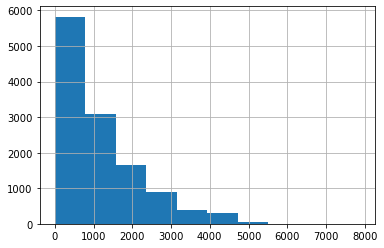

In [7]:
df['cnt'].hist()

## Explorative Data Analysis of the Relationship Between cnt and Quantitative Variables

The relationships between different variables can be analysed through correlations.

The correlations between quantitative variables

In [8]:
df_quantitative.corr()

,cnt,t1,t2,hum,wind_speed
cnt,1.000000,0.384216,0.364773,-0.457498,0.115649
t1,0.384216,1.000000,0.988304,-0.439397,0.139719
t2,0.364773,0.988304,1.000000,-0.394916,0.083620
hum,-0.457498,-0.439397,-0.394916,1.000000,-0.284379
wind_speed,0.115649,0.139719,0.083620,-0.284379,1.000000


The result shows strong relationship between t1 and t2. This is rational because t1 is real temperature in C and t2 is temperature in C "feels like". t1 and t2 are highly related in real life. Besides, All of the quantitative variables (t1, t2, hum and wind_speed) have relationships with cnt. The most cnt-related variable is hum.

The correlations sometimes can be influenced by exception values. To avoid this situation, visualizing the relationships between each pair of quantitative variables is necessary.

Scatter diagrams of quantitative variables

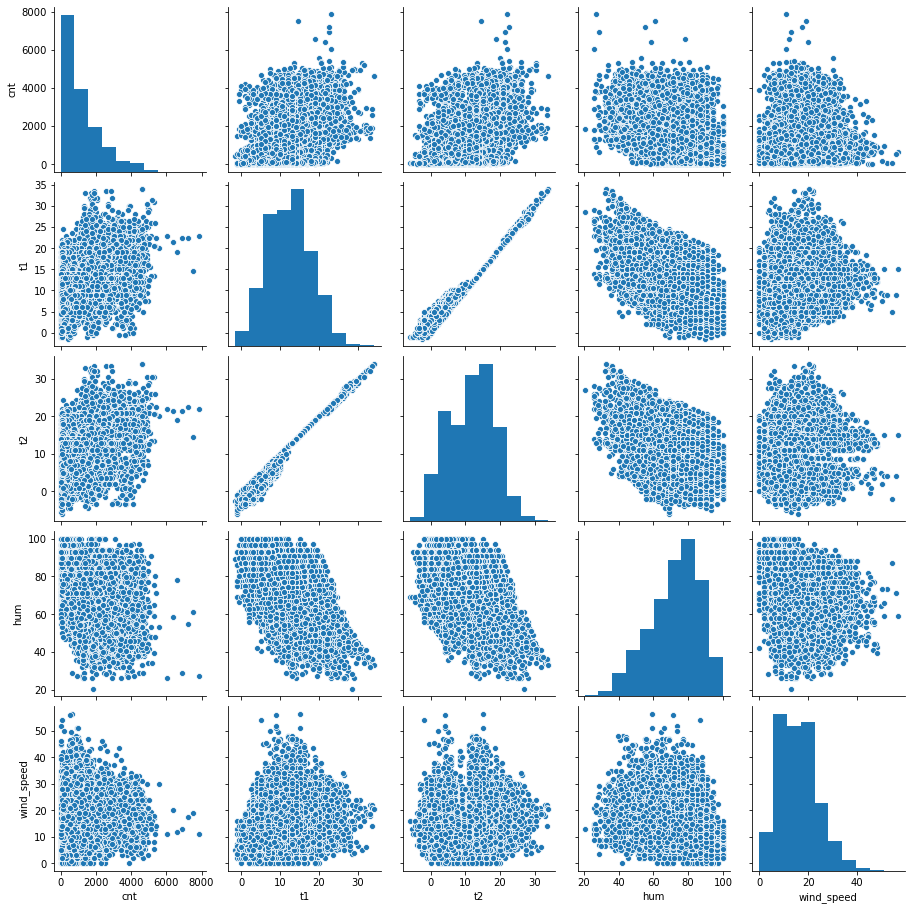

In [9]:
%config InlineBackend.figure_format = 'png'
sns.pairplot(df_quantitative)

Scatter diagrams show the distributions of variables are acceptable.

## Explorative Data Analysis of the Relationship Between cnt and Categorical Variables

To visualize the relationships between cnt and categorical variables, plot scatter diagrams of numerical variables.

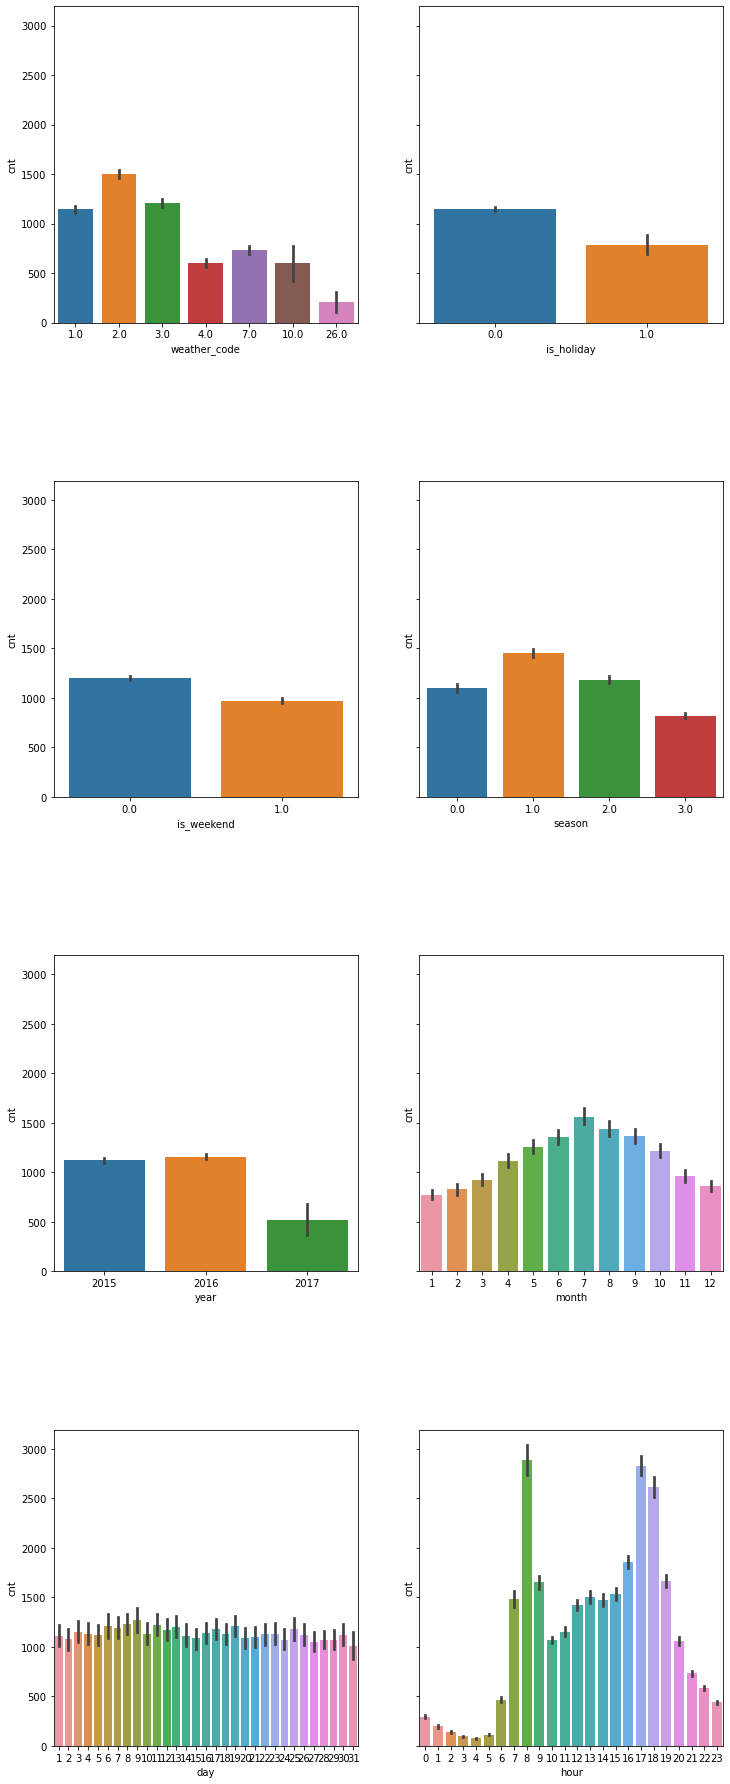

In [10]:
fig, axes = plt.subplots(4, 2, sharey=True, figsize=(12, 32))
fig.subplots_adjust(hspace=0.5)
idx = 0
for x_temp in categorical:
    ax = axes[int(idx/2), idx%2]
    sns.barplot(x=x_temp, y='cnt', data=df, ax=ax)
    ax.set_xlabel(x_temp)
    ax.set_ylabel('cnt')
    idx = idx+1

The results show that more people prefer to ride share bike at 8:00 and 17:00-18:00. Moreover, weather code, season, month, weekend and holiday also influence cnt.

For the further analysis of categorical variables, compare the cnt-related variables in time series.

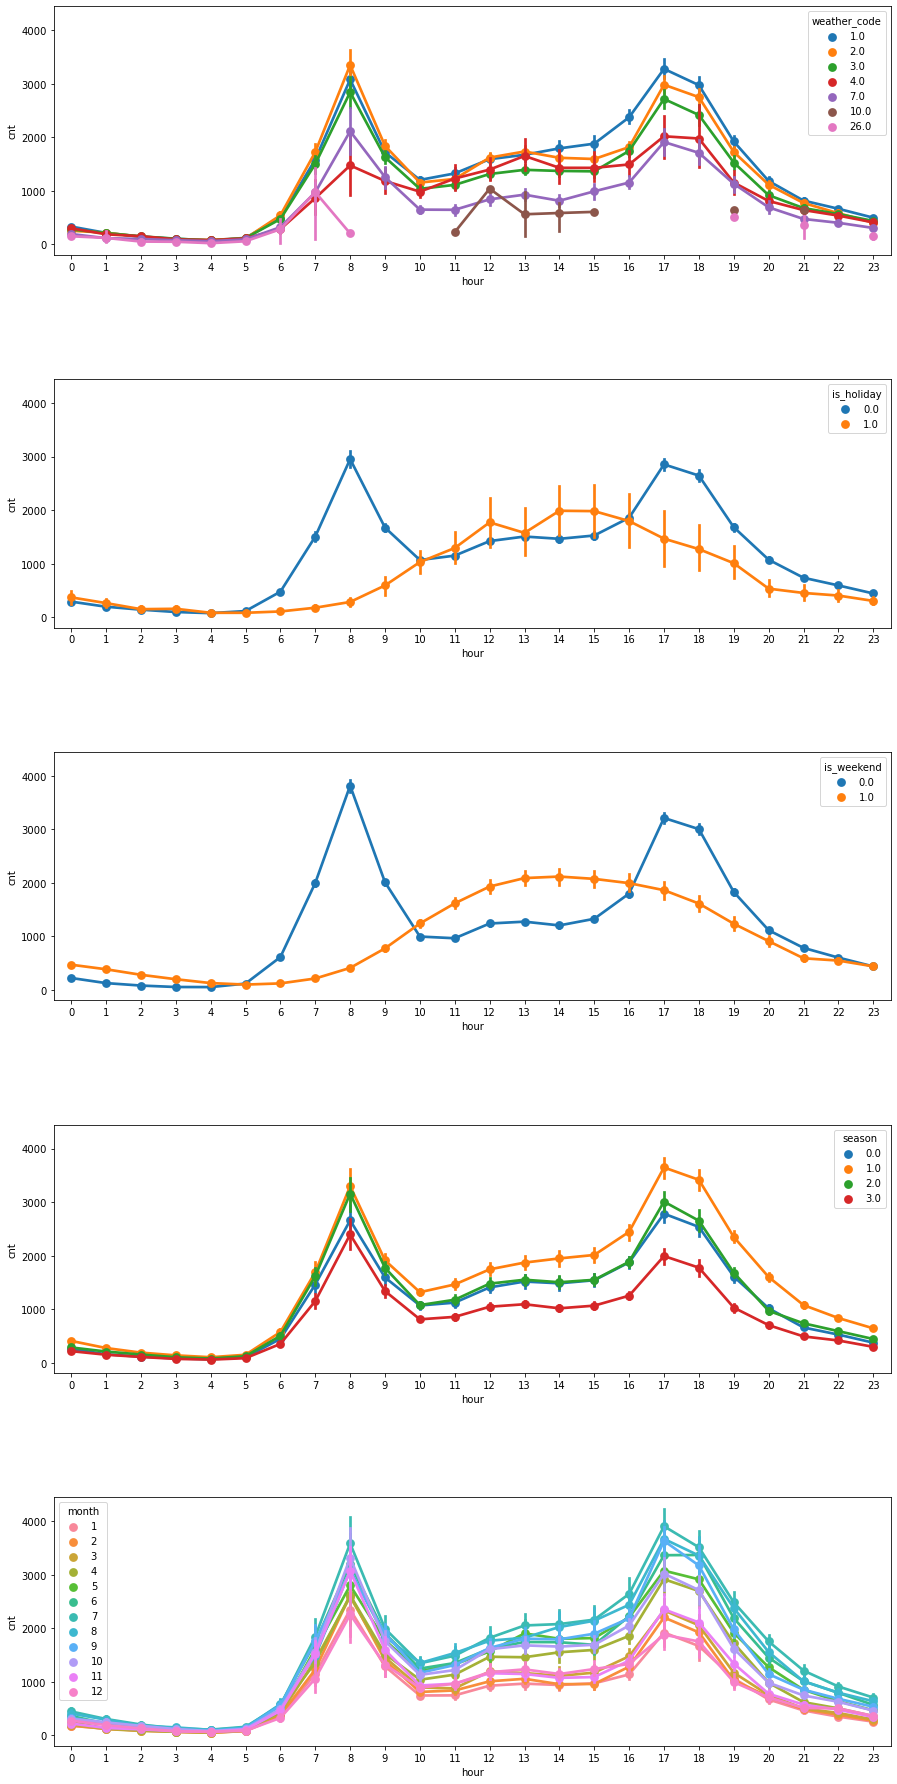

In [11]:
fig, axes = plt.subplots(5, 1, sharey=True, figsize=(15, 32))
fig.subplots_adjust(hspace=0.5)
idx = 0
categorical_2 = ['weather_code','is_holiday', 'is_weekend', 'season', 'month']
for hue_temp in categorical_2:
    ax = axes[idx]
    sns.pointplot(x='hour', y='cnt', hue=hue_temp, data=df, ax=ax)
    ax.set_xlabel('hour')
    ax.set_ylabel('cnt')
    idx = idx+1

The result indicates that people are more likely to ride share bikes when weather is moderate.

The result also shows that holiday and weekend influence the distribution of cnt in hour significantly. People tend to ride share bikes at 8:00 and 17:00-18:00 in working day and tend to use share bikes at 12:00-16:00 in weekend and holiday.

Moreover, people are more likely to ride share bikes in summer rather than in winter when they go home.

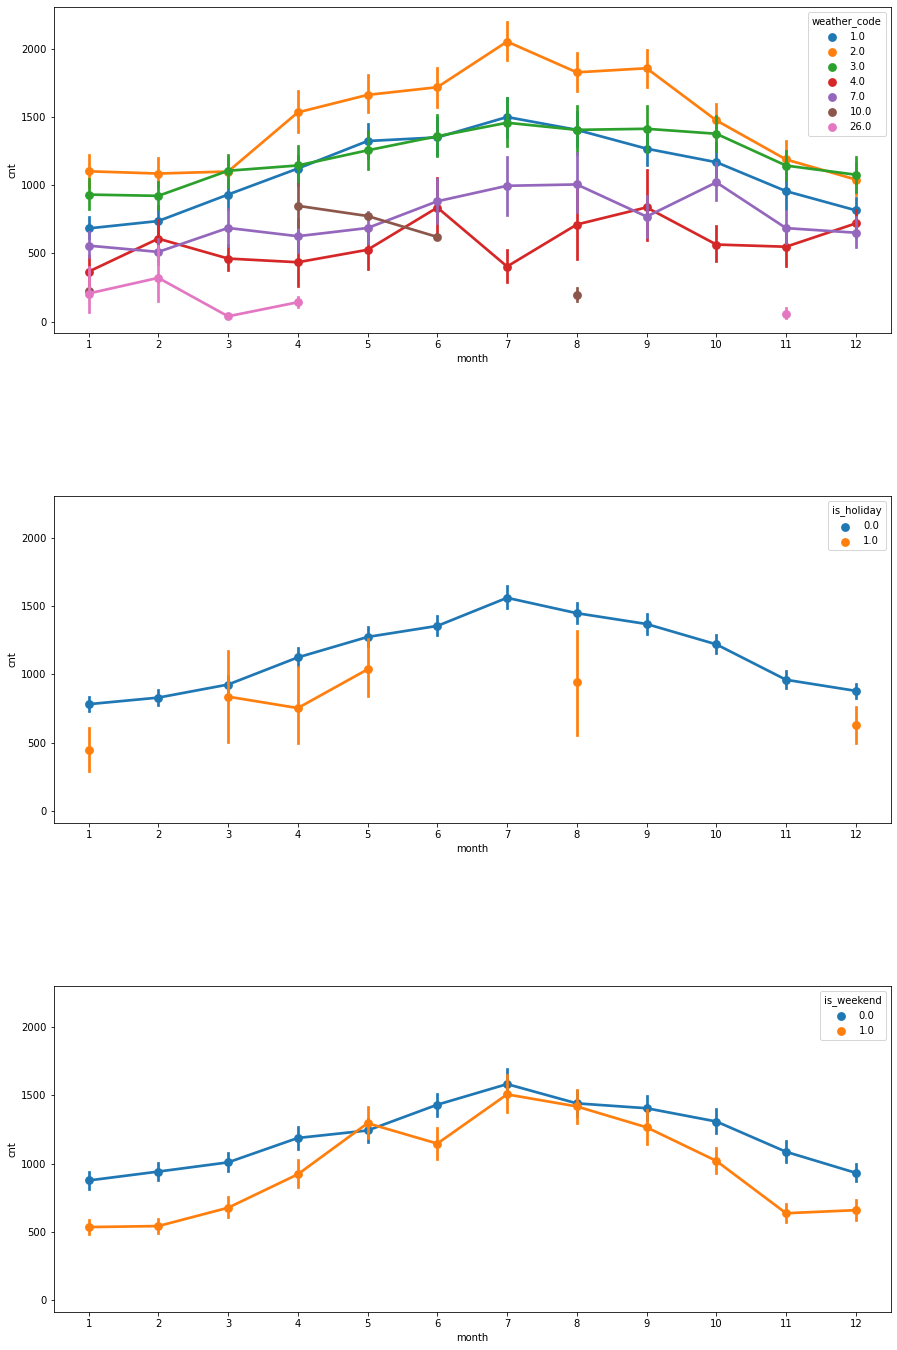

In [12]:
fig, axes = plt.subplots(3, 1, sharey=True, figsize=(15, 24))
fig.subplots_adjust(hspace=0.5)
idx = 0
categorical_2 = ['weather_code','is_holiday', 'is_weekend']
for hue_temp in categorical_2:
    ax = axes[idx]
    sns.pointplot(x='month', y='cnt', hue=hue_temp, data=df, ax=ax)
    ax.set_xlabel('month')
    ax.set_ylabel('cnt')
    idx = idx+1

People ride these bikes  more frequently in working days rather than in weekends and holidays. 

Besides, the result indicates that people are more likely to ride share bikes when weather is moderate.